# SPS Python Tutorial, Day 1
---
*January 29/30, 2020*

Luc Le Pottier, University of Michigan

## **2: data storage and loading**
This section will introduce tensor libraries and compressed file format libraries, such as
- the `numpy` module:
    - `ndarray` data storage object and associated functions
    - basic numerical constants and mathematical functions
    - loading and saving datasets in `npz` format

- the `h5py` module:
    - what an HDF5 file is/why it is useful
    - loading and saving datasets to HDF5 format with `h5py`
    
- the `pandas` module:
    - `DataFrame` object and associated functions
    - data loading and processing functionality

### **2.1: numpy**

We'll start with (probably) the most fundamental python library, `numpy`. I won't pretend that anyone is unfamiliar with numpy. but I will go over a few things. 

**what is a python tensor?**

Tensors in Python are objects with shape $n_1\times n_2 \times ... \times n_m$, containing $\prod_{i=0}^m n_i$ elements total. They are important to us because they are

- fixed in size (very different from the C++ vector, for instance)
- extremely fast to do math with
- *very* useful for machine learning

There are plenty of python libraries full of functions and objects which provide easy creation, manipulation, and interpretation of tensors. Numpy, pandas, and many of the machine learning libraries we will see later all fall into this classification. 

numpy itself is useful because it is 
- implemented mostly in C and fortran, meaning it is a *lot* faster than python alone (10-100 times)
- full of useful but esoteric data processing functions
- the proud owner of its own compressed data type

lets look some numpy features:

In [24]:
# the classic pseudonym
import numpy as np

##### new arrays
this can be from zeros, ones, raw memory (empty), random distributions, etc.

In [282]:
# zeros
z0 = np.zeros((5,10,2))

# ones
z1 = np.ones((3,2))

# empty
z_empty = np.empty((10,7))

# uniform data
uniform = np.random.uniform(3, 4, 10)

# gaussian data in any shape
gaussian = np.random.normal(loc=1, scale=0.5, size=(3, 5))

# ones tensor in the shape of the gaussian tensor
gaussian0 = np.ones_like(gaussian)

# z_empty might have data in it already
z_empty

array([[4.975    , 1.224991 , 4.975015 , 1.225    , 4.975015 , 1.315    ,
        5.125    ],
       [1.3599955, 5.275    , 1.404991 , 5.275015 , 1.405    , 5.425    ,
        1.4499955],
       [5.5000075, 1.495    , 5.425    , 1.5400045, 5.275    , 1.555003 ,
        5.125015 ],
       [1.585    , 5.125015 , 1.675    , 5.125    , 1.675009 , 5.124985 ,
        1.675    ],
       [4.975    , 1.645003 , 4.825    , 1.6300045, 4.675    , 1.585009 ,
        4.674985 ],
       [1.585    , 4.674985 , 1.495    , 4.5999925, 1.405    , 4.525    ,
        1.315009 ],
       [4.375015 , 1.405    , 4.375    , 1.405009 , 4.225    , 1.405009 ,
        4.224985 ],
       [1.405    , 4.1499925, 1.315    , 4.225    , 1.2699955, 4.375    ,
        1.2699955],
       [4.525    , 1.314991 , 4.675    , 1.314991 , 4.675015 , 1.315    ,
        4.825    ],
       [1.3599955, 4.974985 , 1.315    , 4.974985 , 1.225    , 4.975    ,
        1.224991 ]])

##### conversion from other types

this can be done from many types; you basically just want to plug into the `np.asarray` function and see. 

Generators are a special case. this is useful when you want to inspect the output of a generator, i.e. for debugging. Generators are usually used for massive amounts of data; i.e. when you don't want to/can not load all of your data into memory at once, but you still need to analyze / train models on that data.

This example is not that case, but is still interesting. Note how the count must be specified, as numpy has fixed-size arrays: 

In [284]:
# from lists
a = [1, 5, 2, 3, -1]
np_arr = np.asarray(a)

# convert from generators
def data_generator(N):
    for i in range(N):
        # some resource intensive calculation
        yield i**2 - np.log(i + 1)
        
n = 50
gen = data_generator(n)
np_gen = np.fromiter(gen, dtype=float, count=n)
np_gen

array([0.00000000e+00, 3.06852819e-01, 2.90138771e+00, 7.61370564e+00,
       1.43905621e+01, 2.32082405e+01, 3.40540899e+01, 4.69205585e+01,
       6.18027754e+01, 7.86974149e+01, 9.76021047e+01, 1.18515093e+02,
       1.41435051e+02, 1.66360943e+02, 1.93291950e+02, 2.22227411e+02,
       2.53166787e+02, 2.86109628e+02, 3.21055561e+02, 3.58004268e+02,
       3.96955478e+02, 4.37908958e+02, 4.80864506e+02, 5.25821946e+02,
       5.72781124e+02, 6.21741903e+02, 6.72704163e+02, 7.25667795e+02,
       7.80632704e+02, 8.37598803e+02, 8.96566013e+02, 9.57534264e+02,
       1.02050349e+03, 1.08547364e+03, 1.15244465e+03, 1.22141648e+03,
       1.29238908e+03, 1.36536241e+03, 1.44033644e+03, 1.51731112e+03,
       1.59628643e+03, 1.67726233e+03, 1.76023880e+03, 1.84521581e+03,
       1.93219334e+03, 2.02117136e+03, 2.11214985e+03, 2.20512880e+03,
       2.30010818e+03, 2.39708798e+03])

##### vectorizing operations
There are many parts of numpy which can provide *huge* time savings (in exchange for memory) by vectorizing for-loops. `np.tile` is specifically useful for this goal.

An example of when this might be necessary is if you wanted to calculate all combinations of sums of two vectors, which would return a matrix. This can be done in a for-loop, and vectorized. Both are shown here:

In [328]:
from time import time

n1, n2 = 1000, 600

v1 = np.random.uniform(0, 10, n1)
v2 = np.random.uniform(-5, -1, n2)

# for-loop method:
t0 = time()
for_result = []

for i in range(len(v1)):
    for_result.append([])
    for j in range(len(v2)):
        for_result[i].append(v1[i] + v2[j])
for_result = np.asarray(for_result)

print('{:>15}: {:.8f} s'.format('for-loop method', time() - t0))
    
# vectorized method:
t0 = time()
result = np.tile(v1, [len(v2), 1]).T + np.tile(v2, [len(v1), 1])
print('{:>15}: {:.8f} s'.format('vector method', time() - t0))

print(np.isclose(result, for_result).all())

for-loop method: 0.40220141 s
  vector method: 0.00242782 s
True


We can see that the vectorized method is *generally* 1-2 orders of magnitude faster, especially as the vector sizes $n_1$ and $n_2$ grow large

##### data types

we can also save huge datasets using numpys custom data format, `.npy`. 

We can save one array:

In [401]:
big_data = np.random.normal(loc=5.0, scale=2., size=(10000,200))
np.save('test', big_data)

reloaded = np.load('test.npy')

np.isclose(reloaded, big_data).all()

True

Or, we can save multiple to a .zip style file, which can then be reloaded as an archive:

In [411]:
other_data = np.empty((100,20))

np.savez('test', big_data=big_data, other_data=other_data)

archive = np.load('test.npz')
(archive['other_data'] == other_data).all()

False

##### using .npy and .npz files
pros:
- significantly faster than using .csv files
- provides a file archiving system for in-time access of data
- lazy-loaded; i.e. loading an archive does not load all files into memory

cons:
- specific to python & numpy
- partial loading must be done at save-time

### 2.2: pandas

Pandas is an awesome module build on top of numpy. It provides
- category visualization
- plotting
- fast numpy-based math
- builtin file-reading functions

... among other things. We will briefly show how useful it can be by constructing a pandas DataFrame, the main matrix-like object. 

In [525]:
import pandas as pd


# make random data of size N
N = 150
year = np.random.randint(1950, 1990, N)

income = 1e3*np.round(np.random.normal(loc=62, scale=20, size=N))
income[income < 1000] = 1000

# some fake relation between income and # cars
n_cars = (income**3./(income**3.).mean() + np.random.uniform(-.5, 1.0, N)).astype(int)

data = pd.DataFrame({'birth_year': year, 'income': income, 'n_cars': n_cars})

we can then do tons of things with the dataset. 

In [526]:
# first 10 entries
data.head(10)

,birth_year,income,n_cars
0,1965,108000.0,4
1,1960,49000.0,1
2,1975,75000.0,1
3,1951,54000.0,0
4,1965,61000.0,1
5,1970,55000.0,1
6,1958,62000.0,1
7,1984,46000.0,0
8,1959,71000.0,1
9,1978,63000.0,0


In [527]:
# specific variable access
data.birth_year.head(10)

0    1965
1    1960
2    1975
3    1951
4    1965
5    1970
6    1958
7    1984
8    1959
9    1978
Name: birth_year, dtype: int64

In [528]:
# value counting
data.n_cars.value_counts()

0    69
1    57
2    18
4     3
3     3
Name: n_cars, dtype: int64

##### composite columns
It is easy to add columns to a dataframe, like a dictionary:

In [557]:
data['income_per_car'] = data.income/data.n_cars

data.income_per_car.head(10)

0    2.700000e+04
1    4.900000e+04
2    7.500000e+04
3             inf
4    6.100000e+04
5    5.500000e+04
6    6.200000e+04
7             inf
8    7.100000e+04
9             inf
Name: income_per_car, dtype: float64

we can also replace bad entries, i.e. division by zero. We can also fill NaN entries. 

In [562]:
data.income_per_car.replace(np.inf, np.nan, inplace=True)
data.income_per_car.head()

0    27000.0
1    49000.0
2    75000.0
3        NaN
4    61000.0
Name: income_per_car, dtype: float64

In [564]:
data.fillna(0, inplace=True)
data.head(10)

,birth_year,income,n_cars,income_per_car
0,1965,108000.0,4,27000.0
1,1960,49000.0,1,49000.0
2,1975,75000.0,1,75000.0
3,1951,54000.0,0,0.0
4,1965,61000.0,1,61000.0
5,1970,55000.0,1,55000.0
6,1958,62000.0,1,62000.0
7,1984,46000.0,0,0.0
8,1959,71000.0,1,71000.0
9,1978,63000.0,0,0.0


##### pandas plotting
pandas dataframes have some built-in plotting functionality, though it is slightly limited. Some of the more interesting ones are boxplots:

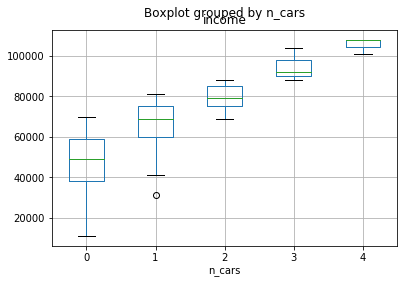

In [565]:
_ = data.boxplot('income', 'n_cars')

histograms:

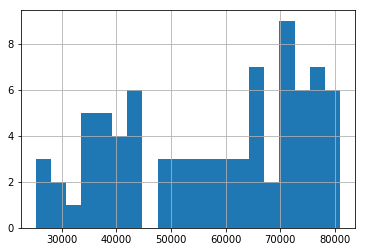

In [570]:
_ = data.income_per_car[data.income_per_car > 0].hist(bins=20)

... and regular plotting 

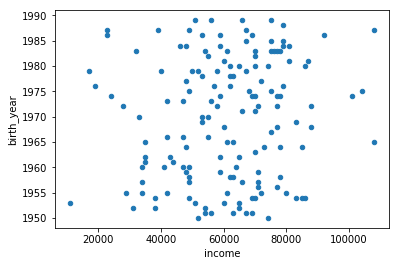

In [573]:
_ = data.plot('income', 'birth_year', kind='scatter')

We will get more into the plotting later.

##### loading/saving data

pandas provides tons of resources for loading and saving data, listed below:

In [575]:
for elt in dir(pd):
    if elt.startswith('read_'):
        print(elt)

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_parquet
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table


this can be super nice when dealing with strange file formats, i.e. excel, clipboard, sql, etc.

Lets load up a .csv file (provided by google colab) 

### 2.2: HDF5 files

HDF5 is a file format which essentially fixes the mentioned numpy file issues. It is

- cross-language
- able to load any subset of data
- very very very very fast
- awesome heirarchical structure

Lets look at these things in demonstration. 

##### hierarchal structure

lets grab some test dataset first.

In [421]:
print(sns.get_dataset_names())

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


/home/luclepot/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /home/luclepot/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


array(['usa', 'japan', 'europe'], dtype=object)

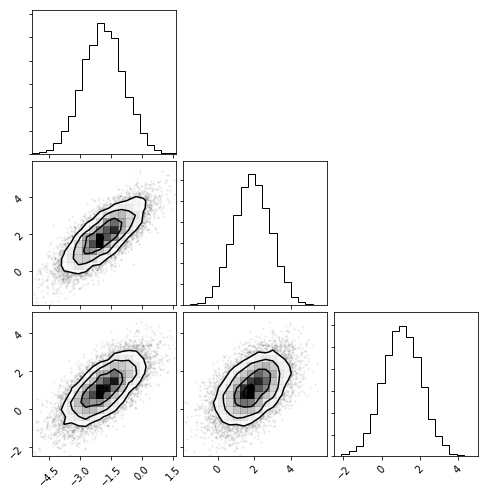

In [389]:
n = 3
means = np.random.uniform(-2, 2, n)
cov = np.random.uniform(0, 1, size=(n,n))
cov = np.maximum(np.mean([cov, cov.T], axis=0), np.identity(n)) 

big_data = np.random.multivariate_normal(mean=means, cov=cov.T, size=10000)
_ = corner.corner(big_data)

In [384]:
print(cov)
np.mean([cov, cov.T], axis=0)

[[0.94804284 0.86279045]
 [0.33636155 0.38124371]]


array([[0.94804284, 0.599576  ],
       [0.599576  , 0.38124371]])

In [368]:
cov

array([[1.        , 0.27836239],
       [0.27836239, 1.        ]])

In [365]:
cov

array([[1.        , 0.86645821, 0.96213056, 0.42808959, 0.48304275],
       [0.86645821, 1.        , 0.51405364, 0.6535445 , 0.87658362],
       [0.96213056, 0.51405364, 1.        , 0.62254528, 0.76664242],
       [0.42808959, 0.6535445 , 0.62254528, 1.        , 0.14496329],
       [0.48304275, 0.87658362, 0.76664242, 0.14496329, 1.        ]])

In [347]:
cov

array([[0.09627007, 0.58408259, 0.5138458 ],
       [0.58408259, 0.76536368, 0.77629845],
       [0.5138458 , 0.77629845, 0.08332593]])

In [89]:
bins, vals

(array([ 9, 23, 14, 27, 16, 26, 18,  6,  5,  6]),
 array([4.48, 4.84, 5.2 , 5.56, 5.92, 6.28, 6.64, 7.  , 7.36, 7.72]))

In [34]:
import pandas as pd
import seaborn as sns

In [37]:
iris = sns.load_dataset('iris')

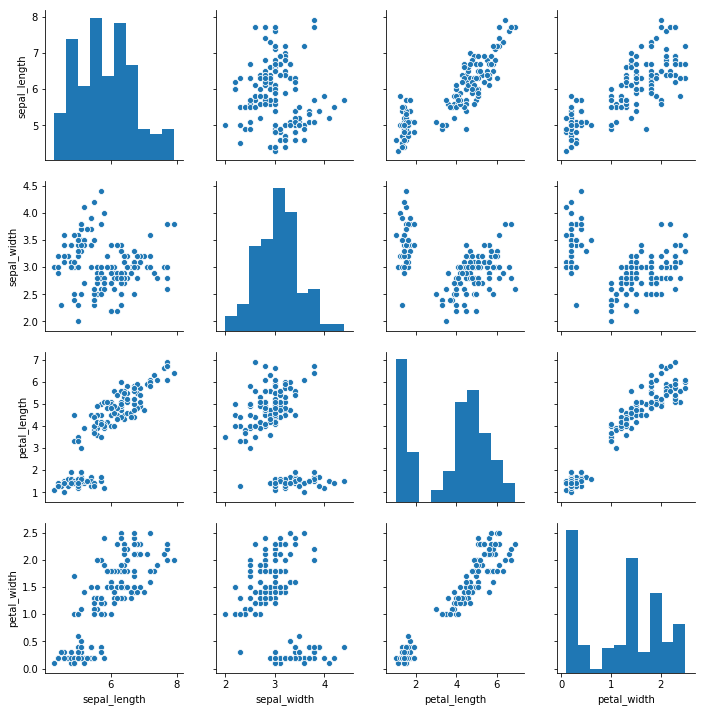

In [50]:
sns.pairplot(iris)

[(4.3, 7.9), (2.0, 4.4), (1.0, 6.9), (0.1, 2.5), ('setosa', 'virginica')]

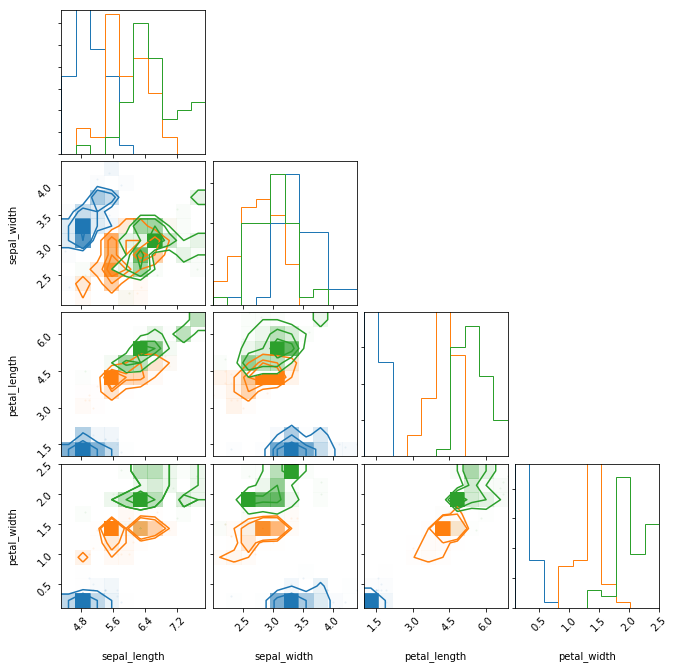

In [67]:
import corner
import matplotlib.pyplot as plt

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig = None
for i,s in enumerate(iris.species.unique()):
    fig = corner.corner(iris[iris.species == s].drop('species', axis=1), fig=fig, bins=10, color=colors[i], range=list(zip(iris.min().values, iris.max().values))[:-1])
plt.show()

In [60]:
import matplotlib.colors as clr
clr.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [33]:
l = [2, 3, 5, 1]
np.array(l)

array([2, 3, 5, 1])

Numpy can be created from scratch

In [22]:
train = np.random.randn(10,5).sum(axis=1)
test = np.random.randn(5,5).sum(axis=1)

tx = np.tile(train, [test.shape[0], 1])
ty = np.tile(test, [train.shape[0], 1])
tx.shape, ty.shape, train.shape, test.shape
# tx - ty.T

((5, 10), (10, 5), (10,), (5,))